In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as mdl
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

%matplotlib inline

## Load the data

In [3]:
test_df = pd.read_csv('00_data/test_v2.csv.zip', compression='zip', low_memory=False, na_values='NA')
train_df = pd.read_csv('00_data/train_v2.csv.zip', compression='zip', low_memory=False, na_values='NA')

In [4]:
desc_train = train_df.describe()
desc_test = test_df.describe()

According to [this discussion](https://www.kaggle.com/c/loan-default-prediction/discussion/6978), the variables f776, f77, and f778 are categorical, while the variables f2, f4, and f5 can also be seen as categorical.

In [5]:
np.array([test_df.shape, train_df.shape])

array([[210944,    770],
       [105471,    771]])

(array([  12.,    0.,    2.,    4.,    8.,   12.,    5.,    0.,   21.,  707.]),
 array([  86638. ,   88521.3,   90404.6,   92287.9,   94171.2,   96054.5,
          97937.8,   99821.1,  101704.4,  103587.7,  105471. ]),
 <a list of 10 Patch objects>)

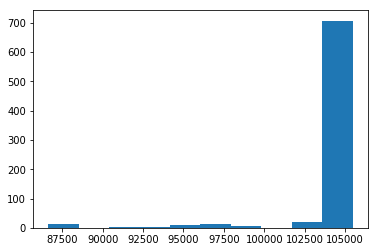

In [6]:
plt.hist(train_df.count())

From the above chart, we can see that in the train data set we have a few variables with 87,500 values, which is more than 83% of observations. Thus, let's keep all of them. Let's check this information on the test data frame

(array([  10.,    2.,    2.,    9.,    3.,   12.,    4.,    0.,   29.,  699.]),
 array([ 174430. ,  178081.4,  181732.8,  185384.2,  189035.6,  192687. ,
         196338.4,  199989.8,  203641.2,  207292.6,  210944. ]),
 <a list of 10 Patch objects>)

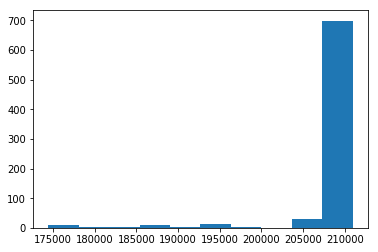

In [7]:
plt.hist(test_df.count())

The lowest number of counts for a variable on the test set is 175,000, exactly the same proportion presented on the train set.

In [22]:
X_train, X_test, y_train, y_test = mdl.train_test_split(train_df.iloc[:, 1:769],  
                                                        train_df.iloc[:, 770],
                                                        random_state=0, train_size=0.75, test_size=0.25)

In [25]:
clf_dt = DecisionTreeClassifier(max_depth=50)
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').